In [2]:
import psycopg2
import pandas as pd

In [2]:
# CREATE THE CONNECTION
conn = psycopg2.connect("host=classmstecs.postgres.database.azure.com port=5432 dbname=class user={...} password={...} sslmode=require")

In [3]:
# QUERY DATA
with conn.cursor() as cur:
    cur.execute("""
        SELECT 
            CAST(EXTRACT( 'MONTH' from air_period) AS INT) AS mon,
            CAST(AVG(air_passengers) AS INT) AS avg
        FROM airline_passengers 
        GROUP BY mon
        ORDER BY mon
        ;        
    """)
    query_data = cur.fetchall()

In [11]:
df = pd.DataFrame(query_data,columns=["month","avg_passenger"])
df

,month,avg_passenger
0,1,242
1,2,235
2,3,270
3,4,267
4,5,272
5,6,312
6,7,351
7,8,351
8,9,302
9,10,267


<AxesSubplot:xlabel='month'>

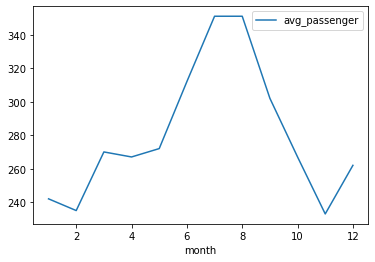

In [12]:
df.plot(x="month", y="avg_passenger")

In [ ]:
# QUERY DATA
with conn.cursor() as cur:
    cur.execute("""
        INSERT INTO airline_passengers (air_period,air_passengers)
            VALUES(%s,%s)
        ;        
    """,('2022',100)
    conn.commit()

In [4]:
conn.close()